In [250]:
import numpy as np
import matplotlib.pyplot as plt

In [251]:
def transf_fourier_d (t_k, y_k,f):
    suma_fourier=0
    for i in range(0,len(t_k)):
        suma_fourier=+suma_fourier+y_k[i]*np.exp(-2*np.pi*1j*t_k[i]*f)
        
    return suma_fourier

In [252]:
t_k=np.linspace(0,20,200)
y_k=np.sin(t_k)
f=0.1

In [253]:
x=transf_fourier_d(t_k,y_k,f)
x

(10.18289058873271-9.43536532570872j)

Pregunta 2

In [254]:
N=100
max=50
t=np.linspace(0,max,N)
y=np.sin(2*np.pi*np.sqrt(2)*t)
f=np.linspace(0,1/((t[1])),100)    

In [255]:
norma=abs(transf_fourier_d(t,y,f))
eje_y=np.log10(norma)
eje_y

array([-8.35202469e-03, -7.84701368e-03, -6.32815343e-03, -3.78386139e-03,
       -1.94491315e-04,  4.46819925e-03,  1.02418358e-02,  1.71745139e-02,
        2.53262528e-02,  3.47709109e-02,  4.55986947e-02,  5.79194522e-02,
        7.18670191e-02,  8.76050123e-02,  1.05334651e-01,  1.25305482e-01,
        1.47830383e-01,  1.73307002e-01,  2.02249254e-01,  2.35335050e-01,
        2.73481406e-01,  3.17968194e-01,  3.70653911e-01,  4.34380009e-01,
        5.13804051e-01,  6.17357865e-01,  7.62853877e-01,  1.00008422e+00,
        1.63669786e+00,  1.23374557e+00,  8.39248839e-01,  6.25946644e-01,
        4.75733177e-01,  3.57760960e-01,  2.59248848e-01,  1.73632155e-01,
        9.70731767e-02,  2.71246610e-02, -3.78701693e-02, -9.90743308e-02,
       -1.57308979e-01, -2.13124603e-01, -2.66817538e-01, -3.18400371e-01,
       -3.67527733e-01, -4.13382780e-01, -4.54552804e-01, -4.88975494e-01,
       -5.14107542e-01, -5.27465304e-01, -5.27465304e-01, -5.14107542e-01,
       -4.88975494e-01, -

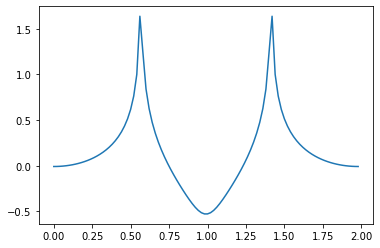

In [256]:
fig, ax = plt.subplots()

plt.plot(f, eje_y)

plt.show()

In [257]:
ruido=np.random.normal(0.0,0.1,len(y))
y_ruido=y+ruido

In [258]:
norma_ruido=abs(transf_fourier_d(t,y_ruido,f))
eje_y_ruido=np.log10(norma_ruido)
eje_y_ruido

array([ 0.52807193,  0.05877145,  0.00604157,  0.12639966, -0.07318395,
        0.09987712,  0.30397394, -0.24189043,  0.05725772, -0.06119409,
        0.15642851,  0.11787782,  0.30482187,  0.29552743,  0.15487464,
        0.01262324,  0.01539922,  0.27261099,  0.1627093 ,  0.11505597,
        0.14392804,  0.21490038,  0.38928317,  0.45774355,  0.39421418,
        0.61352876,  0.72220098,  0.99382857,  1.6363397 ,  1.27304589,
        0.90588065,  0.64683391,  0.47871076,  0.51987318, -0.11554542,
        0.37453365,  0.21059164,  0.22686687,  0.15025234,  0.11530004,
        0.1735215 , -0.45887456, -0.16299556, -0.03376685, -0.70810448,
       -0.28325938, -0.33699034,  0.22282231, -0.11513169, -0.06963752,
       -0.06963752, -0.11513169,  0.22282231, -0.33699034, -0.28325938,
       -0.70810448, -0.03376685, -0.16299556, -0.45887456,  0.1735215 ,
        0.11530004,  0.15025234,  0.22686687,  0.21059164,  0.37453365,
       -0.11554542,  0.51987318,  0.47871076,  0.64683391,  0.90

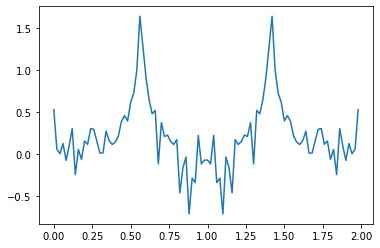

In [259]:
fig, ax = plt.subplots()

plt.plot(f, eje_y_ruido)

plt.show()

Pregunta 3